In [3]:
#!/usr/bin/env python3
# coding: utf-8
# import classy module
from classy import Class
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [4]:
common_settings = {
'omega_b':0.0223828,
'h':0.67810,
'z_reio':7.6711,
'YHe':0.25,
'N_ur': 3.05,
'perturbations_verbose':1,
'background_verbose':3,
'output':'mPk',
'gauge':'newtonian',
'P_k_max_1/Mpc':10,
}

In [ ]:
standardCDM = Class()
standardCDM.set(common_settings)
standardCDM.set({'omega_cdm':0.12})
standardCDM.compute()

In [6]:
dmcannCDM = Class()
# pass input parameters
dmcannCDM.set(common_settings)

q_canndm=10.5e-5
m_canndm=1.e5

dmcannCDM.set({
'omega_cdm':0,
'm_canndm':m_canndm,
'q_canndm':q_canndm,
'omega_canndm':'0.12',
})
dmcannCDM.compute()

Running CLASS version v3.2.0
Computing background
Chose ndf15 as generic_evolver
Cann specie has chemically frozen out at a=8.794169e-07, (2)
Freeze out temperature computed to be 6.995786e+32 invMpc, at a=8.794169e-07
 -> age = 13.773510 Gyr
 -> conformal age = 14156.015121 Mpc
 -> N_eff = 3.05007 (summed over all species that are non-relativistic at early times) 
 -> radiation/matter equality at z = 3400.436122
    corresponding to conformal time = 112.853533 Mpc
 ---------------------------- Budget equation ----------------------- 
 ---> Nonrelativistic Species 
-> Bayrons                        Omega = 0.0486773       , omega = 0.0223828      
-> Cannibalistic Dark Matter      Omega = 0.260972        , omega = 0.12           
 ---> Relativistic Species 
-> Photons                        Omega = 5.37815e-05     , omega = 2.47298e-05    
-> Ultra-relativistic relics      Omega = 3.72532e-05     , omega = 1.71298e-05    
 ---> Other Content 
-> Cosmological Constant          Omega = 0

In [7]:
kk = np.logspace(-4,np.log10(10),500) # k in h/Mpc
Pkcann = [] # P(k) in (Mpc/h)**3
Pkstand = [] # P(k) in (Mpc/h)**3
h = dmcannCDM.h() # get reduced Hubble for conversions to 1/Mpc

for k in kk:
    Pkcann.append(dmcannCDM.pk(k*h,0.)*h**3) # function .pk(k,z)
    Pkstand.append(standardCDM.pk(k*h,0.)*h**3 ) # function .pk(k,z)

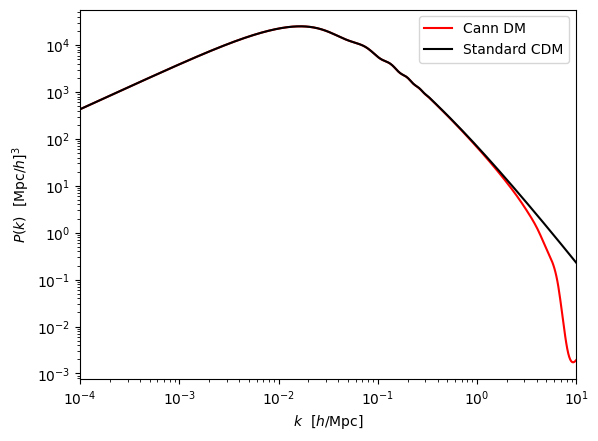

In [9]:
plt.figure(2)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,Pkcann,'r-',label=r'Cann DM')
plt.plot(kk,Pkstand,'k-',label=r'Standard CDM')


plt.legend(loc='best')
#plt.savefig('latexfiles/complete_example_mpk.pdf',bbox_inches='tight')

plt.show()

In [10]:
dmcannCDM.empty()
standardCDM.empty()